# Art Integration Project

As per a new CBSE circular, CBSE art-integrated projects are mandatory from 2020-21 in every subject, which would be considered for internal assessment. Hence, this kernel. My problem statement was:

Do comparison of Delhi and Sikkim on the basis of:
* Production and consumption of electricity.
* Renewable sources of energy

---

Artistic expression has been an integral part of human's growth and development. Over the centuries, as the thrust of education shifted to livelihood, putting the importance of Art in a back seat. Art Integration aims to be a cross-curricular approach to teaching and learning based on collaboration between the teaching of subject with the teaching of Art. This integration is meant not only to make the learning process joyful, but it also lends itself to imbibing a greater appreciation and understanding of the art form being utilized for this purpose.

---


# Some Interesting Facts


India is the world's third-largest producer and third-largest consumer of electricity. The national electric grid in India has an installed capacity of 370.106 GW as of 31 March 2020. 

* Renewable power plants, which also include large hydroelectric plants, constitute 35.86% of India's total installed capacity. During the 2018-19 fiscal year, the gross electricity generated by utilities in India was 1,372 TWh and the total electricity generation (utilities and non-utilities) in the country was 1,547 TWh. The gross electricity consumption in 2018-19 was 1,181 kWh per capita.

* In 2015-16, electric energy consumption in agriculture was recorded as being the highest (17.89%) worldwide. The per capita electricity consumption is low compared to most other countries despite India having a low electricity tariff.

* India's electricity sector is dominated by fossil fuels, in particular coal, which during the 2018-19 fiscal year produced about three-quarters of the country's electricity. The government is making efforts to increase investment in renewable energy. The government's National Electricity Plan of 2018 states that the country does not need more non-renewable power plants in the utility sector until 2027, with the commissioning of 50,025 MW coal-based power plants under construction and addition of 275,000 MW total renewable power capacity after the retirement of nearly 48,000 MW old coal-fired plants.

* India has recorded rapid growth in electricity generation since 1985, increasing from 179 TW-hr in 1985 to 1,057 TW-hr in 2012. The majority of the increase came from coal-fired plants and non-conventional renewable energy sources (RES), with the contribution from natural gas, oil, and hydro plants decreasing in 2012-2017. The gross utility electricity generation (excluding imports from Bhutan) was 1,384 billion kWh in 2019-20, representing 1.0 % annual growth compared to 2018-2019. The contribution from renewable energy sources was nearly 20% of the total. In the year 2019-20, all the incremental electricity generation is contributed by renewable energy sources as the power generation from fossil fuels decreased.

In light of the recent COVID-19 situation, when everyone has been under lockdown for the months of April & May the impacts of the lockdown on economic activities have been faced by every sector in a positive or a negative way.

# 😌 Importing Packages

In this kernel I've primarily used [plotly](https://plotly.com/) and [bar_chart_race](https://www.dexplo.org/bar_chart_race/) for the visualisations. The `bar_chart_race` had to be installed using pip.

In [1]:
%%capture
%matplotlib notebook

## Installing the bar_chart_race package
!pip install bar_chart_race

## Importing Packages
import os
import calendar
import numpy as np 
import pandas as pd
import plotly.io as pio
import plotly.express as px
import bar_chart_race as bcr
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

## Importing Dataset
df = pd.read_csv('../input/state-wise-power-consumption-in-india/dataset_tk.csv')
df_long = pd.read_csv('../input/state-wise-power-consumption-in-india/long_data_.csv')
state_df = pd.read_csv("../input/daily-power-generation-in-india-20172020/State_Region_corrected.csv")
generation_data = pd.read_csv("../input/daily-power-generation-in-india-20172020/file_02.csv")

# 💪🏻 Pre-Processing

We use Two Datasets in this kernel: 

* [Daily Power Generation in India (2017-2020)](https://www.kaggle.com/navinmundhra/daily-power-generation-in-india-20172020)

* [Power consumption in India(2019-2020)](https://www.kaggle.com/twinkle0705/state-wise-power-consumption-in-india)

---

**Unhide** to see the code.

In [2]:
## Converting the "Date" columns to standard Datetime format
df['Date'] = pd.to_datetime(df["Unnamed: 0"], dayfirst=True)
df_long['Dates'] = pd.to_datetime(df_long.Dates, dayfirst=True)

### For Power generation comparision

## Regional Data
delhi = state_df[state_df["State / Union territory (UT)"]  == "Delhi"]
sikkim = state_df[state_df["State / Union territory (UT)"] == "Sikkim"]
state = delhi.append(sikkim, ignore_index = True)

## Data related to renewable sources

# Convert to standard Datetime format
generation_data['Date'] = pd.to_datetime(generation_data['Date'])

# Convert str values to float
generation_data['Thermal Generation Estimated (in MU)'] = generation_data['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')
generation_data['Thermal Generation Actual (in MU)'] = generation_data['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')

# Make two different Dataframes acc to the Region
northern_data = generation_data.loc[generation_data["Region"] == "Northern"]
eastern_data = generation_data.loc[generation_data["Region"] == "Eastern"]

# Code inspired from Lokesh Rathi's work. Link provided in markdown
def time_series_overall(df1, df2, groupby, dict_features_1, dict_features_2, filter=None):
    
    temp1 = df1.groupby(groupby).agg(dict_features_1)
    temp2 = df2.groupby(groupby).agg(dict_features_2)
    fig = go.Figure()
    
    for f,c in zip(dict_features_1, px.colors.qualitative.D3):
        fig.add_traces(go.Scatter(y=temp1[f].values,
                              x=temp1.index,
                              name=f,
                              marker=dict(color=c)
                             ))
    for f,c in zip(dict_features_2, px.colors.qualitative.D3):
        fig.add_traces(go.Scatter(y=temp2[f].values,
                              x=temp2.index,
                              name=f,
                              marker=dict(color=c)
                             ))
    fig.update_traces(marker_line_color='rgb(255,255,255)',
                      marker_line_width=2.5, opacity=0.7)
    
    fig.update_layout(
                    width=1000,
                    xaxis=dict(title="Date", showgrid=False),
                    yaxis=dict(title="MU", showgrid=False),
                    legend=dict(
                                x=0,
                                y=1.2))
                                
    fig.show()
    
# Reset index
northern_data = northern_data.reset_index(drop = True)
eastern_data = eastern_data.reset_index(drop = True)

# Rename columns
northern_data = northern_data.rename(columns = {
    "Thermal Generation Actual (in MU)" : "Thermal Generation Actual (in MU) in Northern Region",
    "Thermal Generation Estimated (in MU)" : "Thermal Generation Estimated (in MU) in Northern Region",
    "Nuclear Generation Actual (in MU)" : "Nuclear Generation Actual (in MU) in Northern Region",
    "Nuclear Generation Estimated (in MU)" : "Nuclear Generation Estimated (in MU) in Northern Region",
    "Hydro Generation Actual (in MU)" : "Hydro Generation Actual (in MU) in Northern Region",
    "Hydro Generation Estimated (in MU)" : "Hydro Generation Estimated (in MU) in Northern Region"
})

# Rename columns
eastern_data = eastern_data.rename(columns = {
    "Thermal Generation Actual (in MU)" : "Thermal Generation Actual (in MU) in Eastern Region",
    "Thermal Generation Estimated (in MU)" : "Thermal Generation Estimated (in MU) in Eastern Region",
    "Nuclear Generation Actual (in MU)" : "Nuclear Generation Actual (in MU) in Eastern Region",
    "Nuclear Generation Estimated (in MU)" : "Nuclear Generation Estimated (in MU) in Eastern Region",
    "Hydro Generation Actual (in MU)" : "Hydro Generation Actual (in MU) in Eastern Region",
    "Hydro Generation Estimated (in MU)" : "Hydro Generation Estimated (in MU) in Eastern Region"
})

### For Power usage comparision
Delhi = df_long[df_long['States']=='Delhi']
Sikkim = df_long[df_long['States']=='Sikkim']

# 🧐 Exploratory Data Analysis

**Unhide** the following Output to view the Description of the Datasets.

In [3]:
df.info()
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         503 non-null    object        
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

# 🥼 Insights

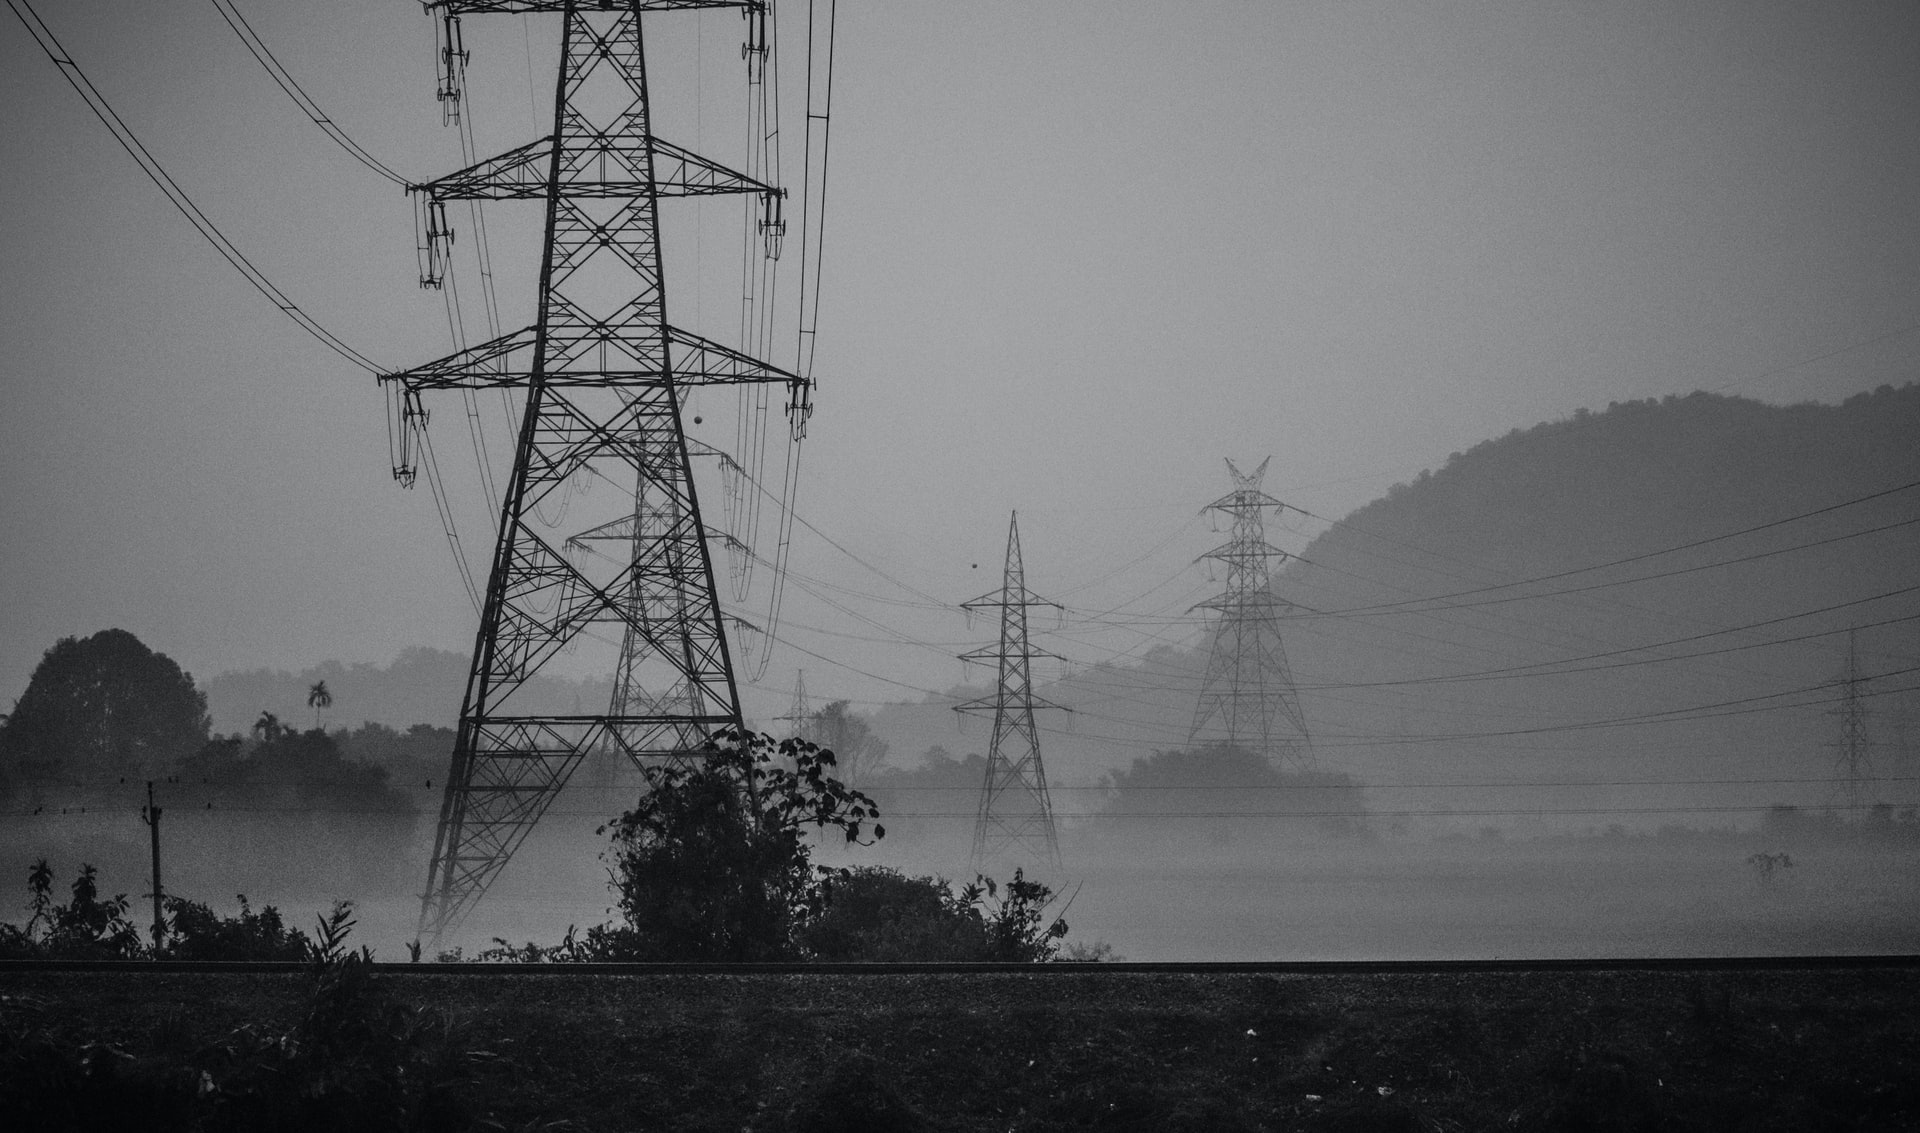

<span>Photo by <a href="https://unsplash.com/@neelkamal_zip?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Neelkamal Deka</a> on <a href="https://unsplash.com/s/photos/india-electricity?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

# 🔌 Power Consumption Comparision

We create a Time Series plot on how the Power consumption of the Two states varies for a period of 17 months beginning from 2nd Jan 2019 till 23rd May 2020. We also add a `range_selector` to allow Three views for 1, 3 and 6 months respectively. 

The code in this section was ported from [@TwinkleKhanna](https://www.kaggle.com/twinkle0705/an-interactive-eda-of-electricity-consumption)'s kernel and adapted to only display Delhi and Sikkim's data.

In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date, y=df.Delhi,
    mode='lines',
    name='Delhi',
    marker=dict(
            color='rgba(300, 50, 50, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=df.Date, y=df.Sikkim,
    mode='lines',
    name='Sikkim',
    marker=dict(
            color='rgba(0,0,128, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    ),
    rangeselector_font_color = "rgba(0,0,0,0.8)"
)

fig.update_layout(title='Power Consumption: 🧐 Delhi vs Sikkim (in MU)')
fig.update_layout(width=800,height=500)
fig.show()

Here, we use `bar_chart_race` to make a animated bar chart race on how the Power Consumption between Delhi and Sikkim varies. 

In [5]:
bcr_df = df[
    ['Date','Delhi','Sikkim']
]

bcr_df = bcr_df.set_index('Date')
bcr.bar_chart_race(bcr_df, 
                   figsize=(4, 3.5), 
                   period_length = 100,
                   filename = None, 
                   title='Power Consumption through Time')

# 🗼 Delhi vs Sikkim : Maximum Power Usage

In the following code cells we use plotly Indicators to visualise the Maximum Power usage in Delhi and Sikkim using gauges.

In [6]:
fig= go.Figure(go.Indicator(
    mode = "gauge+number",
    value = Delhi['Usage'].max(),
    title = {'text': "Max Power Usage In Delhi (in MU)"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

<div class="alert alert-danger" role="alert" style = "min_height: 80px; text-align: center; padding: 30px;">
   Delhi uses way more Energy than Sikkim does (around <b>50x</b> more). Obviously Delhi being the Captial city has way more residents than Sikkim, thus it's huge power consumption.
</div>

In [7]:
fig= go.Figure(go.Indicator(
    mode = "gauge+number",
    value = Sikkim['Usage'].max(),
    title = {'text': "Max Power Usage In Sikkim (in MU)"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

# 📡 Delhi vs Sikkim : Power Distribution


<div class="alert alert-danger" role="alert" style = "min_height: 80px; text-align: center; padding: 30px;">
   Here, we compare the Power Distribution between Delhi and Sikkim. Interestingly, Sikkim contributes more than Delhi (around <b>0.15%</b>) to the National Share of Power Generation while it uses way less than Delhi. 

</div>

In [8]:
fig = px.bar(state.nlargest(2, "National Share (%)"),
       x = 'National Share (%)',
       y = 'State / Union territory (UT)',
       text="National Share (%)",
      color ='State / Union territory (UT)')
fig.show()

# 🌊 Delhi vs Sikkim: Energy Sources

Here, we compare between the Expected and Actual values of Thermal, Nuclear and Hydroelectric sources in Northern and Eastern Regions. This code was ported and modified from [Lokesh Rathi](https://www.kaggle.com/lokeshrth4617/india-s-power-generation-report-2017-2020)'s kernel to compare the values between Delhi and Sikkim.

In [9]:
dict_features_1 = {
    "Thermal Generation Actual (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Thermal Generation Actual (in MU) in Eastern Region": "sum"
}
time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

In [10]:
dict_features_1 = {
    "Thermal Generation Estimated (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Thermal Generation Estimated (in MU) in Eastern Region": "sum"
}

time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

In [11]:
dict_features_1 = {
    "Nuclear Generation Actual (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Nuclear Generation Actual (in MU) in Eastern Region": "sum"
}

time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

In [12]:
dict_features_1 = {
    "Nuclear Generation Estimated (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Nuclear Generation Estimated (in MU) in Eastern Region": "sum"
}

time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

In [13]:
dict_features_1 = {
    "Hydro Generation Actual (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Hydro Generation Actual (in MU) in Eastern Region": "sum"
}
time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

In [14]:
dict_features_1 = {
    "Hydro Generation Estimated (in MU) in Northern Region": "sum"
}

dict_features_2 = {
    "Hydro Generation Estimated (in MU) in Eastern Region": "sum"
}
time_series_overall(northern_data, 
                    eastern_data, 
                    groupby="Date", 
                    dict_features_1 = dict_features_1, 
                    dict_features_2 = dict_features_2)

# Miscellaneous 

In the following code block, we export the dataframes to csv which I'll use for deployment. (Will add link in next version)

In [15]:
northern_data.to_csv("northern_data.csv", index = False)
eastern_data.to_csv("eastern_data.csv", index = False)
state.to_csv("state.csv", index = False)
Delhi.to_csv("Delhi.csv", index = False)
Sikkim.to_csv("Sikkim.csv", index = False)
bcr_df.to_csv("bcr.csv", index = False)
df.to_csv("df.csv", index = False)